In [12]:
from __future__ import absolute_import, division, print_function

from psychopy import visual, core, event, gui, data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Experiment Prompt

In [4]:
myDlg = gui.Dlg(title = 'Visuomotor Adaptation')
myDlg.addField('Participant Number: ')
ok_data = myDlg.show()  # show dialog and wait for OK or Cancel
if myDlg.OK:  # or if ok_data is not None
    print(ok_data)
else:
    print('user cancelled')

['3000']


In [13]:
def run_blocks(block_no, rotation, thetas):

    target_position_thetas = np.array([np.random.permutation(thetas), np.random.permutation(thetas), np.random.permutation(thetas), np.random.permutation(thetas)])
    target_angle_pos = np.ravel(target_position_thetas)
    target_pos_radius = 0.75
    target_xpos = 0.42*np.cos(target_angle_pos)
    target_ypos = 0.75*np.sin(target_angle_pos)
    num_trials = len(target_angle_pos)
    # Create a window to draw in
    my_win = visual.Window((1920, 1080), allowGUI=True, fullscr = True)
    
      
    #Center fixation
    fixation = visual.Circle(my_win, edges=64, size = (0.03, 0.05), pos = [0, 0], fillColor = [1, 0, 0], lineColor = [1, 0, 0])

    #Initialize Variables to return
    rotated_traj_x = np.empty(num_trials, dtype = object)
    rotated_traj_y = np.empty(num_trials, dtype = object)
    initial_time = np.zeros(num_trials)
    movement_time = np.zeros(num_trials)

    for trial in range(num_trials):
        traj_x = list()
        traj_y = list()

        fixation.draw()
        my_win.update()
        #isi
        core.wait(np.random.normal(0.75, 1))
        #Go Target
        target = visual.Circle(my_win, edges=64, size = (0.1, 0.17), pos = [target_xpos[trial], target_ypos[trial]], fillColor = [1, 0, 0], lineColor = [1, 0, 0])
        target.draw()            
        my_win.update()
        #Initialize mouse object
        my_mouse = event.Mouse(visible=False,newPos=[0,0],win=my_win)
        #my_win.update()
        clock_it = core.Clock()
        clock_mt = core.Clock()
        my_mouse.clickReset()
        first_flag = True
        while True:
            #Get current mouse position
            #mouse_x, mouse_y = my_mouse.getPos()

            if my_mouse.getPressed()[0]:
                if first_flag:
                    mouse_x, mouse_y = my_mouse.getPos()

                    initial_time[trial] = clock_it.getTime()
                    x_center = mouse_x
                    y_center = mouse_y
                    #fixation.pos = (0, 0)
                    #fixation.draw()
                    #target.draw()
                    #my_win.update()
                    first_flag = False
                    #print (x_center, y_center)

                mouse_x, mouse_y = my_mouse.getPos()
                cursor_x = (mouse_x-x_center)*np.cos(rotation) + (mouse_y-y_center)*np.sin(rotation)
                cursor_y = -(mouse_x-x_center)*np.sin(rotation) + (mouse_y-y_center)*np.cos(rotation)
                #Change the position of the fixation to the rotated movement from the mouse
                try:
                    fixation.pos = [cursor_x[0], cursor_y[0]]
                    traj_x.append(cursor_x[0])
                    traj_y.append(cursor_y[0])
                except:
                    fixation.pos = [cursor_x, cursor_y]
                    traj_x.append(cursor_x)
                    traj_y.append(cursor_y)

                #Draw on screen
                fixation.draw()
                target.draw()

                #Display on Screen
                my_win.update()

                #Break if fixation reaches the target
                if visual.helpers.polygonsOverlap(fixation, target):
                    movement_time[trial] = clock_mt.getTime()
                    print("Broke")
                    fixation.pos = [0, 0]
                    fixation.draw()
                    
                    #Store Trajectory
                    #print (traj_x)
                    rotated_traj_x[trial] = traj_x
                    #print ('Here')
                    #print (rotated_traj_x)
                    rotated_traj_y[trial] = traj_y
                    break
                #print(rotated_traj_x)
            else:
                traj_x = list()
                traj_y = list()
                fixation.pos = [0, 0]
                fixation.draw()
                clock_it = core.Clock()
                clock_mt = core.Clock()
                first_flag = True
                target.draw()
                my_mouse.setPos([0, 0])
                my_win.update()

        #return fixation back to center
        fixation.fillColor = [1, 0, 0]
        fixation.lineColor = [1, 0, 0]
        fixation.pos = [0, 0]
        fixation.draw()
        my_win.flip()

    core.wait(1.0)

    actual_traj = np.array([rotated_traj_x, rotated_traj_y])
    #Cleanup
    my_win.close()
    #core.quit()
    return (target_angle_pos, actual_traj, initial_time, movement_time)



# Experiment

In [16]:
total_blocks = 13
targets = np.empty(total_blocks, dtype = object)
actual_traj = np.empty(total_blocks, dtype = object)
initial_time = np.empty(total_blocks, dtype = object)
movement_time = np.empty(total_blocks, dtype = object)

random_thetas = np.random.choice(np.array([np.pi/4, 3*np.pi/4, 5*np.pi/4, 7*np.pi/4]), 3 ,replace = False)
learning_thetas = np.repeat(random_thetas, 4)           
learning_rotation = np.random.choice(np.arange(np.pi/3, np.pi/2, 0.05), 1)

thetas = np.repeat(np.array([np.pi/4, 3*np.pi/4, 5*np.pi/4, 7*np.pi/4]), 4)


In [17]:
for block_no in range(13):
    if block_no >0 and block_no < 11:
        targets[block_no], actual_traj[block_no], initial_time[block_no], movement_time[block_no] = run_blocks(block_no, learning_rotation, learning_thetas)
    else:
        if block_no == 11:
            targets[block_no], actual_traj[block_no], initial_time[block_no], movement_time[block_no] = run_blocks(block_no, learning_rotation, thetas)                
        targets[block_no], actual_traj[block_no], initial_time[block_no], movement_time[block_no] = run_blocks(block_no, 0, thetas)
    

Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
12187.8846 	WARNING 	Monitor specification not found. Creating a temporary one...
12187.8960 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1920, 1200]. Using actual size
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
Broke
12304.7845 	WARNING 	Monitor specification not found. Creating a temporary one...
12304.7859 	WARNING 	User requested ful

# Save the data

In [19]:
import os

In [30]:
os.getcwd()
os.chdir('testing_generalization/untested_direction/data/data3000/')

In [36]:
actual_traj[0][0, :]

array([list([0.0, -0.002083333333333333, -0.0072916666666666685, -0.012500000000000004, -0.020833333333333343, -0.029166666666666674, -0.04375, -0.060416666666666674, -0.07604166666666667, -0.09583333333333334, -0.11354166666666667, -0.13333333333333336, -0.14895833333333336, -0.16666666666666669, -0.18333333333333335, -0.19583333333333336, -0.2114583333333333, -0.22499999999999998, -0.23645833333333333, -0.24895833333333334]),
       list([0.0, 0.013541666666666674, 0.02500000000000001, 0.039583333333333345, 0.05625000000000001, 0.07083333333333333, 0.08541666666666667, 0.10312500000000001, 0.12083333333333333, 0.13645833333333335, 0.14895833333333333, 0.1625, 0.171875, 0.18333333333333335, 0.19270833333333334, 0.20416666666666666, 0.21354166666666669, 0.221875, 0.23125, 0.23854166666666665, 0.24479166666666669]),
       list([0.0, 0.009375000000000008, 0.019791666666666666, 0.035416666666666666, 0.053125000000000006, 0.06875, 0.08958333333333333, 0.11145833333333334, 0.13020833333333

In [31]:
#Directory for templates
np.save('targets.npy', targets)
np.save('actual_trajectories.npy', actual_traj)
np.save('its.npy', initial_time)
np.save('mts.npy', movement_time)

In [38]:
np.save('learning_rotation.npy', learning_rotation)

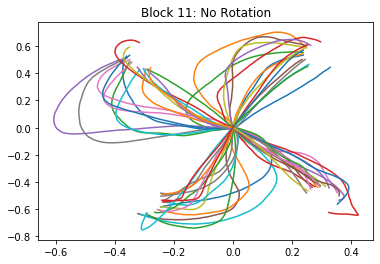

In [66]:
for i in range(64):
    plt.plot(actual_traj[11][0, i], actual_traj[11][1, i])
    plt.title('Block 11: No Rotation')

In [42]:
learning_rotation*90/1.57

array([80.09412714])

In [62]:
np.unique(targets[12])

array([0.78539816, 2.35619449, 3.92699082, 5.49778714])